In [ ]:
#load dataframe from csv file (tidyied data)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np
import seaborn as sns
pd.options.mode.chained_assignment = None


In [ ]:
url = 'https://drive.google.com/file/d/13EYjKfR3nLPlO1Fp6JrMV5zqVDh97Hct/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
# Q1

# Select a season to work on
new_df = df.loc[df['season'] == 20202021]
new_df


,event_Idx,periodTime,id_team_that_shot,name_team_that_shot,result_event,x_coord,y_coord,goalie_name,shooter_name,shot_type,empty_net,strength,type_season,id_game,season,dateTime,endDateTime,abstractGameState,team_away_name,team_home_name
163873,14,02:03,1,New Jersey Devils,Shot,66.0,31.0,Igor Shesterkin,Jesper Bratt,Snap Shot,NaN,NaN,regular_season,2020020180,20202021,2021-03-05T00:00:00Z,2021-03-05T02:35:36Z,Final,New York Rangers,New Jersey Devils
163874,29,05:23,3,New York Rangers,Shot,-35.0,-6.0,Mackenzie Blackwood,Filip Chytil,Wrist Shot,NaN,NaN,regular_season,2020020180,20202021,2021-03-05T00:00:00Z,2021-03-05T02:35:36Z,Final,New York Rangers,New Jersey Devils
163875,33,06:53,1,New Jersey Devils,Shot,41.0,-27.0,Igor Shesterkin,Sami Vatanen,Snap Shot,NaN,NaN,regular_season,2020020180,20202021,2021-03-05T00:00:00Z,2021-03-05T02:35:36Z,Final,New York Rangers,New Jersey Devils
163876,36,07:12,1,New Jersey Devils,Goal,61.0,5.0,Igor Shesterkin,Jack Hughes,Snap Shot,False,NaN,regular_season,2020020180,20202021,2021-03-05T00:00:00Z,2021-03-05T02:35:36Z,Final,New York Rangers,New Jersey Devils
163877,39,07:32,1,New Jersey Devils,Shot,36.0,16.0,Igor Shesterkin,Ty Smith,Wrist Shot,NaN,NaN,regular_season,2020020180,20202021,2021-03-05T00:00:00Z,2021-03-05T02:35:36Z,Final,New York Rangers,New Jersey Devils
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222705,265,12:58,9,Ottawa Senators,Shot,35.0,32.0,Braden Holtby,Erik Gudbranson,Wrist Shot,NaN,NaN,playoffs,2020020117,20202021,2021-01-29T03:00:00Z,2021-01-29T05:28:46Z,Final,Ottawa Senators,Vancouver Canucks
222706,279,15:27,23,Vancouver Canucks,Shot,-33.0,-29.0,Matt Murray,Jordie Benn,Snap Shot,NaN,NaN,playoffs,2020020117,20202021,2021-01-29T03:00:00Z,2021-01-29T05:28:46Z,Final,Ottawa Senators,Vancouver Canucks
222707,297,19:03,23,Vancouver Canucks,Shot,-42.0,-27.0,Matt Murray,Zack MacEwen,Wrist Shot,NaN,NaN,playoffs,2020020117,20202021,2021-01-29T03:00:00Z,2021-01-29T05:28:46Z,Final,Ottawa Senators,Vancouver Canucks
222708,304,19:54,9,Ottawa Senators,Shot,38.0,21.0,Braden Holtby,Mike Reilly,Slap Shot,NaN,NaN,playoffs,2020020117,20202021,2021-01-29T03:00:00Z,2021-01-29T05:28:46Z,Final,Ottawa Senators,Vancouver Canucks


In [ ]:
# Obtain the count for all shots
shots_count = new_df['shot_type'].count()
print(shots_count)

58833


In [ ]:
# Obtain the count for each shot type
shots_per_type = new_df.groupby('shot_type')['shot_type'].count()
print(shots_per_type)

shot_type
Backhand        4523
Deflected       1160
Slap Shot       8219
Snap Shot       8091
Tip-In          2846
Wrap-around      563
Wrist Shot     33431
Name: shot_type, dtype: int64


In [ ]:
# Obtain the goals count per shot type
goal_per_shot_type = (new_df.loc[new_df['result_event'] == 'Goal']).groupby('shot_type')['shot_type'].count()
goal_per_shot_type

shot_type
Backhand        557
Deflected       179
Slap Shot       583
Snap Shot       849
Tip-In          518
Wrap-around      36
Wrist Shot     3089
Name: shot_type, dtype: int64

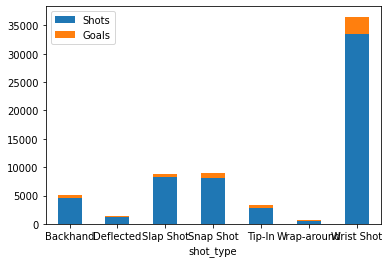

In [ ]:
# Representation of Shots accross all teams vs Goals by shot type for the selected season year
# Data for the x and y axis
x1 = goal_per_shot_type
x2 = shots_per_type

df2 = pd.concat([x2, x1], axis =1, keys=['Shots', 'Goals'])
df2.plot.bar(stacked=True, rot=0)

In [ ]:
df2['ratio'] = (df2['Goals'] / (df2['Goals'] + df2['Shots'])).round(2)
print(df2)
max = df2['ratio'].max()
print("\n\nThe most dangerous type of shots seems to be the Tip-In because of the highest ratio of goals over shots of", max, 
      "\nThe most common type of shots is the Wrist Shot.")
print("\nUsing this figure was the best and simplest way to show a stacked view of both the goals and shots per type.")

             Shots  Goals  ratio
shot_type                       
Backhand      4523    557   0.11
Deflected     1160    179   0.13
Slap Shot     8219    583   0.07
Snap Shot     8091    849   0.09
Tip-In        2846    518   0.15
Wrap-around    563     36   0.06
Wrist Shot   33431   3089   0.08


The most dangerous type of shots seems to be the Tip-In because of the highest ratio of goals over shots of 0.15 
The most common type of shots is the Wrist Shot.

Using this figure was the best and simplest way to show a stacked view of both the goals and shots per type.


In [ ]:
# Q2
# Select multiple seasons starting 2018-2019 up to 2020-2021
# Explore the relationship between the distance a shot was taken and the chance it was a goal
# Describe briefly each figure and notice any change over the seasons. Why use this particular figure? 

# Get the different dataframes for each season between 2018 and 2020
df_2018 = df.loc[df['season'] == 20182019].filter(['result_event', 'x_coord', 'y_coord', 'shot_type'])
df_2019 = df.loc[df['season'] == 20192020].filter(['result_event', 'x_coord', 'y_coord'])
df_2020 = df.loc[df['season'] == 20202021].filter(['result_event', 'x_coord', 'y_coord'])
df_2018

,result_event,x_coord,y_coord,shot_type
222710,Shot,-39.0,-33.0,Snap Shot
222711,Shot,-47.0,23.0,Snap Shot
222712,Shot,-78.0,5.0,Snap Shot
222713,Shot,-39.0,-13.0,Snap Shot
222714,Shot,-76.0,-32.0,Backhand
...,...,...,...,...
309818,Shot,89.0,4.0,Wrist Shot
309819,Shot,-50.0,-37.0,Wrist Shot
309820,Shot,-58.0,-20.0,Wrist Shot
309821,Shot,-21.0,15.0,Wrist Shot


In [ ]:
df_2018['dist'] = np.sqrt(np.square(90 - abs(df_2018['x_coord'])) + np.square(df_2018['y_coord']))
df_2019['dist'] = np.sqrt(np.square(90 - abs(df_2019['x_coord'])) + np.square(df_2019['y_coord']))
df_2020['dist'] = np.sqrt(np.square(90 - abs(df_2020['x_coord'])) + np.square(df_2020['y_coord']))

In [ ]:
df_2018_with_type = df_2018.drop(['x_coord', 'y_coord'], axis=1)
df_2018 = df_2018.drop(['x_coord', 'y_coord', 'shot_type'], axis =1)
df_2019 = df_2019.drop(['x_coord', 'y_coord'], axis =1)
df_2020 = df_2020.drop(['x_coord', 'y_coord'], axis =1)
df_2018_with_type

,result_event,shot_type,dist
222710,Shot,Snap Shot,60.745370
222711,Shot,Snap Shot,48.764741
222712,Shot,Snap Shot,13.000000
222713,Shot,Snap Shot,52.630789
222714,Shot,Backhand,34.928498
...,...,...,...
309818,Shot,Wrist Shot,4.123106
309819,Shot,Wrist Shot,54.488531
309820,Shot,Wrist Shot,37.735925
309821,Shot,Wrist Shot,70.611614


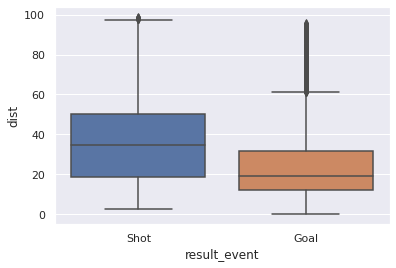

In [ ]:
# Plot for season 2018-2019
sns.set(style="darkgrid")
sns.boxplot(x=df_2018['result_event'], y=df_2018['dist'])
plt.show()


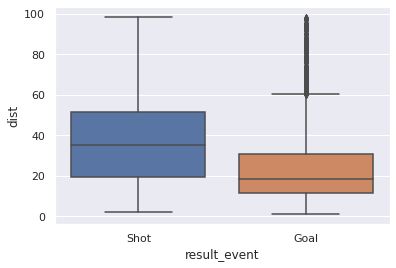

In [ ]:
# Plot for season 2019-2020
sns.set(style="darkgrid")
sns.boxplot(x=df_2019['result_event'], y=df_2019['dist'])
plt.show()

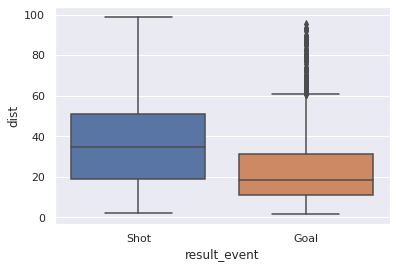

In [ ]:
# Plot for season 2020-2021
sns.set(style="darkgrid")
sns.boxplot(x=df_2020['result_event'], y=df_2020['dist'])
plt.show()

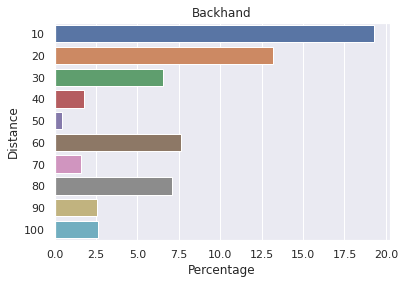

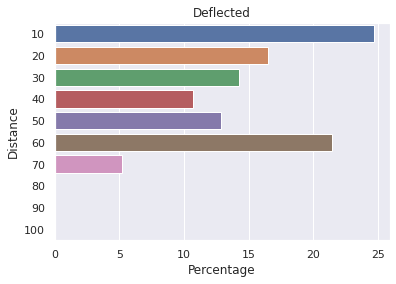

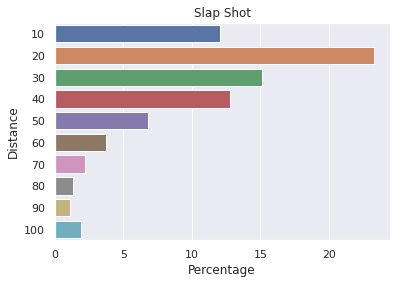

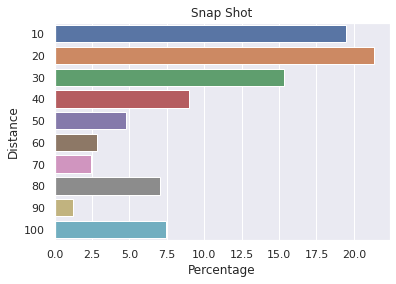

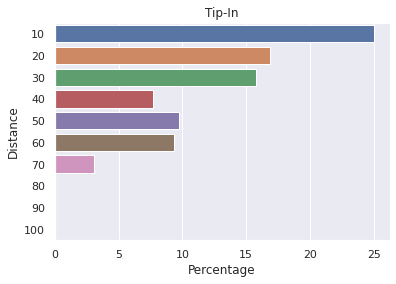

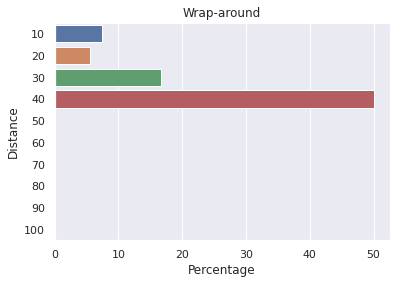

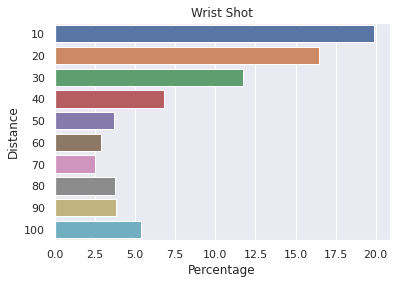

In [ ]:
#@title Version A for q3
# Question 3 -- season 2018-2019 

 # a. Get shots, goals, coords per shot type
 # b. Compute the distance, and goal/shot ratio
 # c. Plot the different graphs (ratio in function of the distance) depending on the shot type

def plotGraph(pframe, currentType):
  pframe['Distance'] = bins[1:]
  pframe.drop('binned', axis=1)
  sns.barplot( x ='Percentage', y ='Distance', data = pframe, orient='h').set_title(currentType)
  plt.show()
  print()

def q3(shot, currentType):  
  shotGroup= shot.get_group(currentType)
  goalGroup = shotGroup.loc[shotGroup['result_event'] == 'Goal']
  
  goalGroup['binned'] = pd.cut(goalGroup['dist'], bins)
  visualGoal = goalGroup.groupby('binned').size().reset_index(name= "goal_count")

  # Compute the percentage of goal
  shotGroup['binned'] = pd.cut(shotGroup['dist'], bins)
  visualAll = shotGroup.groupby(by='binned').size().reset_index(name="shot_count")
  visualGoal['shot_count'] = visualAll['shot_count']
  visualGoal['Percentage'] = visualGoal['goal_count']/visualAll['shot_count'] *100
  plotGraph(visualGoal, currentType)
  
    
shotN = df_2018_with_type.groupby('shot_type')
alltypes = shotN.groups.keys()
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # bins for distance
for atype in alltypes:
  q3(shotN, atype)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


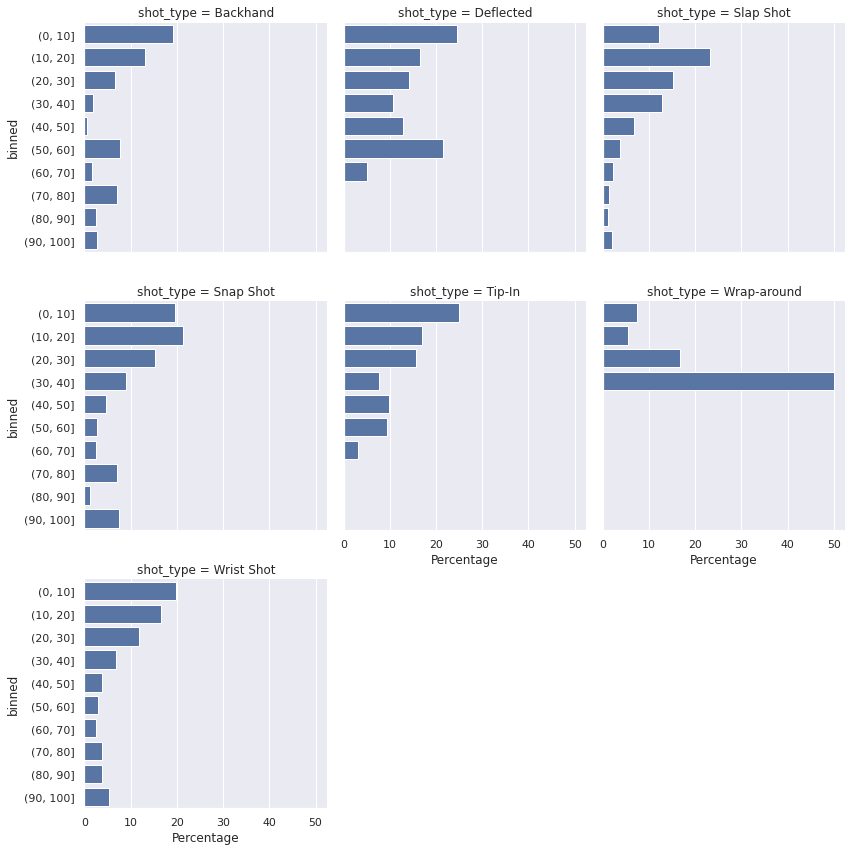

In [ ]:
@title Version B for q3
def plotGraph(pframe):
  g = sns.FacetGrid(pframe, col='shot_type', height=4, col_wrap=3)
  g.map(sns.barplot, 'Percentage', 'binned', orient='h')
  plt.show()
  print()

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] # bins for distance

shotGroup= df_2018_with_type
goalGroup = shotGroup.loc[shotGroup['result_event'] == 'Goal']
goalGroup['binned'] = pd.cut(goalGroup['dist'], bins)
  
visualGoal = goalGroup.groupby(['shot_type','binned']).size().reset_index(name="goal_count")
  
# Compute the percentage of goal
shotGroup['binned'] = pd.cut(shotGroup['dist'], bins)
visualAll = shotGroup.groupby(['shot_type','binned']).size().reset_index(name="shot_count")

visualGoal['shot_count'] = visualAll['shot_count'] # combine the prev line with this one
visualGoal['Percentage'] = visualGoal['goal_count']/visualGoal['shot_count'] * 100
  
plotGraph(visualGoal)